In [1]:
import heppackv0 as hep
import sympy as sy

In [2]:
theta, phi = sy.symbols("theta phi",real=True)
E,D,m = sy.symbols("E D m",real=True,positive=True)
a,b,c,d = sy.symbols("a b c d")

### Task: Calculate $\overline{\psi}^c \psi^c$ and compare to $\overline{\psi} \psi$

### 1. Analytic calculation

Mit  $\overline{\psi} = ((\psi)^*)^T) \gamma^0$ 
und $\psi^c = i \gamma^2 \psi^*$ findet man <br>
$\overline{\psi}^c = ((i \gamma^2 \psi^*)^*)^T \gamma^0 = (-i\gamma^{2*}\psi)^T\gamma^0 = -i\psi^T (\gamma^{2 *})^T \gamma^0
= -i \psi^T\gamma^0\gamma^2$, 

wobei im letzten Schritt $(\gamma^{2 *})^T = - \gamma^2$ und $\gamma^2\gamma^0 = -\gamma^0 \gamma^2$ verwendet wurde. 

Mit  $\gamma^2\gamma^2 = -1$ folgt dann:

$\overline{\psi}^c \psi^c = -i \psi^T\gamma^0 \gamma^2 (i \gamma^2 \psi^*) = - \psi^T\gamma^0 \psi^+ = - (\overline{\psi} \psi)^* = - \overline{\psi} \psi$

Ich denke, dass der letzte Schritt gilt, da $\gamma^0$ eine Diagonalmatrix ist und
jede Komponent in $\psi$ mit dem komplex konjugierten multipliziert wird. 

Therefore
$\overline{\psi} \psi = 2m$ and $\overline{\psi}^c \psi^c = -2m$.



# Test 1: Darstellung von $\psi$ als komplexer Spinor

In [3]:
psi = sy.Matrix([[a],[b],[c],[d]])
psibar = psi.D  # D berechnet Dirac adjoint == bar
display("psi: ", psi)
display("psibar: ", psibar)
psibar*psi
display("psibar*psi: ", psibar*psi)

'psi: '

'psibar: '

'psibar*psi: '

'psic: '

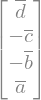

'psicbar: '

'psicbar*psic: '

In [4]:
psic = sy.I*hep.g2*psi.C
psicbar = psic.D
display("psic: ", psic)
display("psicbar: ", psicbar)
display("psicbar*psic: ", psicbar*psic)

In [5]:
psicbar*psic == - psibar*psi

True

# Test 2: Berechnung mit heppackv0

In [6]:
ul = hep.u_l(E,m,theta, phi)
ulbar = hep.u_lbar(E,m,theta, phi)
vl = hep.v_l(E,m,theta, phi)
vlbar = hep.v_lbar(E,m,theta, phi)

In [7]:
sy.simplify(ulbar*ul)

In [8]:
sy.simplify(vlbar*vl)

In [9]:
ulbar*ul == - vlbar*vl

True

#### More General calculation with heppackv0

In [10]:
EE = D+m   # use D>0 instead of E to avoid problems with sqrt(E-m) in sympy. 
ul = hep.u_l(EE,m,theta, phi)
ulbar = ul.D
ulc = sy.I*hep.g2*ul.C
ulcbar = ulc.D

In [11]:
sy.simplify(ulbar*ul)

In [12]:
sy.simplify((ulcbar*ulc).subs(D,E-m))

In [13]:
ulbar*ul == -ulcbar*ulc

True

# Test

In [14]:
hep.g2.C.T==-hep.g2

True

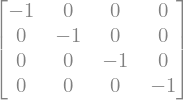

In [15]:
hep.g2*hep.g2

In [16]:
hep.g0*hep.g2 == - hep.g2*hep.g0

True